# Chapter 4 - Intorduction to neural networks  

In [8]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight

error = (pred - goal_pred) ** 2

print(error)

0.30250000000000005


## Learning using the hot and cold method

In [10]:
weight = 0.1

def neural_network(input, weight):
    prediction = input * weight

    return prediction

In [9]:
number_of_toes = [8.5]
win_or_lose_binery = [1]

input = number_of_toes[0]
true = win_or_lose_binery[0]

pred = neural_network(input, weight)

error = (pred - true) ** 2

print(error) # raw error

0.022499999999999975


**COMPARE:** Now we compare the output of the neural network with the desired output. We can then adjust the weights of the network to make the output closer to the desired output.  

We try to move to the learning rate up ```weight+lr``` or down ```weight-lr``` to see if the output is getting closer to the desired output.

In [11]:
lr = 0.01 # learning rate

p_up = neural_network(input, weight+lr)

e_up = (p_up - true) ** 2
print(e_up)

0.004224999999999993


In [12]:
lr = 0.01 

p_dn = neural_network(input, weight-lr)

e_dn = (p_dn - true) ** 2
print(e_dn)

0.05522499999999994


**COMPARE + LEARN**: comapaing the errors and setting a new weight

In [ ]:
if (error > e_dn or error > e_up):
    if (e_dn < e_up):
        weight -=lr
    
    if (e_up < e_dn):
        weight += lr
        

In [14]:
print("new weight: ", weight)

new weight:  0.11


### Hot and Cold learning
This is the simplest form of learning

In [17]:
weight = 0.5
input = 0.5
goal_prediction = 0.8

step_amount = 0.001

In [18]:
for i in range(1101):

    prediction = input * weight
    error = (prediction - goal_prediction) ** 2

    print("Error: " + str(error) + " Prediction: "+ str(prediction))

    up_pred = input * (weight+step_amount)
    up_error = (goal_pred - up_pred) ** 2

    down_pred = input * (weight-step_amount)
    down_error = (goal_pred - down_pred) ** 2

    if(down_error < up_error):
        weight -= step_amount
    
    if(up_error < down_error):
        weight += step_amount


Error: 0.30250000000000005 Prediction: 0.25
Error: 0.3019502500000001 Prediction: 0.2505
Error: 0.30140100000000003 Prediction: 0.251
Error: 0.30085225 Prediction: 0.2515
Error: 0.30030400000000007 Prediction: 0.252
Error: 0.2997562500000001 Prediction: 0.2525
Error: 0.29920900000000006 Prediction: 0.253
Error: 0.29866224999999996 Prediction: 0.2535
Error: 0.29811600000000005 Prediction: 0.254
Error: 0.2975702500000001 Prediction: 0.2545
Error: 0.29702500000000004 Prediction: 0.255
Error: 0.29648025 Prediction: 0.2555
Error: 0.29593600000000003 Prediction: 0.256
Error: 0.2953922500000001 Prediction: 0.2565
Error: 0.294849 Prediction: 0.257
Error: 0.29430625 Prediction: 0.2575
Error: 0.293764 Prediction: 0.258
Error: 0.2932222500000001 Prediction: 0.2585
Error: 0.292681 Prediction: 0.259
Error: 0.29214025 Prediction: 0.2595
Error: 0.2916 Prediction: 0.26
Error: 0.2910602500000001 Prediction: 0.2605
Error: 0.29052100000000003 Prediction: 0.261
Error: 0.28998225 Prediction: 0.2615
Error: 

Hot and cold learning is inefficient because you predict three times to each weight update, and step amount is arbitrary.

## Calculating both direction and amount from error

In [5]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for i in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input
    weight = weight - direction_and_amount

    print("Error: "+ str(error)+ " Prediciton: "+ str(pred))
    print("direction and amount"+ str(direction_and_amount))

Error: 0.30250000000000005 Prediciton: 0.25
direction and amount-0.275
Error: 0.17015625000000004 Prediciton: 0.3875
direction and amount-0.20625000000000002
Error: 0.095712890625 Prediciton: 0.49062500000000003
direction and amount-0.1546875
Error: 0.05383850097656251 Prediciton: 0.56796875
direction and amount-0.11601562500000001
Error: 0.03028415679931642 Prediciton: 0.6259765625
direction and amount-0.08701171875000002
Error: 0.0170348381996155 Prediciton: 0.669482421875
direction and amount-0.06525878906250004
Error: 0.00958209648728372 Prediciton: 0.70211181640625
direction and amount-0.04894409179687503
Error: 0.005389929274097089 Prediciton: 0.7265838623046875
direction and amount-0.03670806884765626
Error: 0.0030318352166796153 Prediciton: 0.7449378967285156
direction and amount-0.02753105163574221
Error: 0.0017054073093822882 Prediciton: 0.7587034225463867
direction and amount-0.020648288726806685
Error: 0.0009592916115275371 Prediciton: 0.76902756690979
direction and amount-

This method allows us **(in a single line of code)** to calculate the `direction` and `amount` of the we should change the weights to reduce the error. 

## One iteration of Gradient Descent

In [3]:
import matplotlib.pyplot as plt

Error: 2.25 Derivative: -0.75 Prediction: 0.5
Error: 1.265625 Derivative: -0.5625 Prediction: 0.875
Error: 0.7119140625 Derivative: -0.421875 Prediction: 1.15625
Error: 0.40045166015625 Derivative: -0.31640625 Prediction: 1.3671875
Error: 0.22525405883789062 Derivative: -0.2373046875 Prediction: 1.525390625
Error: 0.12670540809631348 Derivative: -0.177978515625 Prediction: 1.64404296875
Error: 0.07127179205417633 Derivative: -0.13348388671875 Prediction: 1.7330322265625
Error: 0.040090383030474186 Derivative: -0.1001129150390625 Prediction: 1.799774169921875
Error: 0.02255084045464173 Derivative: -0.07508468627929688 Prediction: 1.8498306274414062
Error: 0.012684847755735973 Derivative: -0.056313514709472656 Prediction: 1.8873729705810547


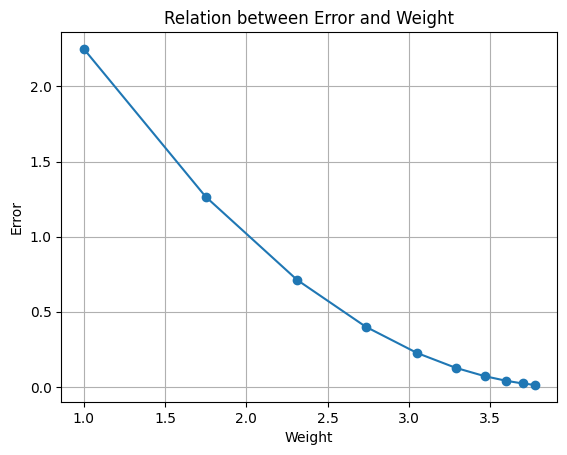

In [15]:
weight, goal_pred, input = (1, 2, 0.5)

weight_values = []
error_values = []

for i in range(10):
    weight_values.append(weight)
    pred = input * weight
    error = (pred - goal_pred) ** 2
    error_values.append(error)


    delta = pred - goal_pred # measure of how much this node missed, "Pure Error"
    weight_delta = delta * input #Derivative (How fast the error changes, given changes in the weight) 

    weight = weight - weight_delta

    


    print("Error: "+str(error) + " Derivative: " + str(weight_delta) + " Prediction: " + str(pred))

plt.plot(weight_values, error_values, marker='o')
plt.xlabel('Weight')
plt.ylabel('Error')
plt.title('Relation between Error and Weight')
plt.grid(True)
plt.show()


# alpha = 0.01 # this is the new part, it lets me control how fast the network learn 
# weight -= weight_delta * alpha

## Breaking Gradient Descent

If the input is sufficiently large, this can make the weight update large even when the error is small. What happens when you have a large weight update and a small error? The network overcorrects. If the new error is even bigger, the network overcorrects even more. This causes the phenomenon you saw earlier, called divergence.

Error: 0.03999999999999998 Derivative: 0.3999999999999999 Prediction: 1.0
Error: 0.3599999999999998 Derivative: -1.1999999999999997 Prediction: 0.20000000000000018
Error: 3.2399999999999984 Derivative: 3.599999999999999 Prediction: 2.5999999999999996
Error: 29.159999999999986 Derivative: -10.799999999999997 Prediction: -4.599999999999999
Error: 262.4399999999999 Derivative: 32.39999999999999 Prediction: 16.999999999999996
Error: 2361.959999999998 Derivative: -97.19999999999996 Prediction: -47.79999999999998
Error: 21257.639999999978 Derivative: 291.59999999999985 Prediction: 146.59999999999994
Error: 191318.75999999983 Derivative: -874.7999999999996 Prediction: -436.5999999999998
Error: 1721868.839999999 Derivative: 2624.399999999999 Prediction: 1312.9999999999995
Error: 15496819.559999991 Derivative: -7873.199999999998 Prediction: -3935.799999999999


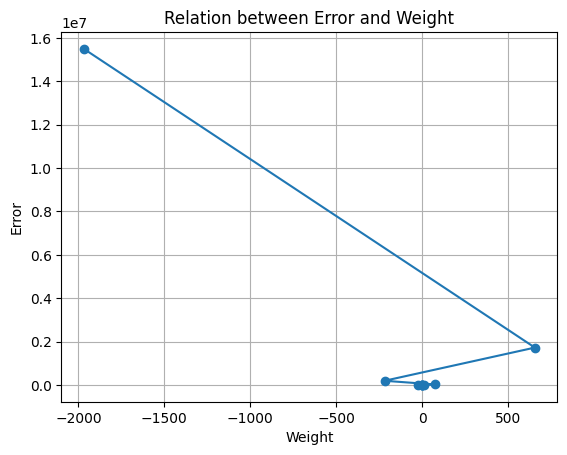

In [16]:
weight, goal_pred, input = (0.5, 0.8, 2)

weight_values = []
error_values = []

for i in range(10):
    weight_values.append(weight)
    pred = input * weight
    error = (pred - goal_pred) ** 2
    error_values.append(error)


    delta = pred - goal_pred # measure of how much this node missed, "Pure Error"
    weight_delta = delta * input #Derivative (How fast the error changes, given changes in the weight) 

    weight = weight - weight_delta

    


    print("Error: "+str(error) + " Derivative: " + str(weight_delta) + " Prediction: " + str(pred))

plt.plot(weight_values, error_values, marker='o')
plt.xlabel('Weight')
plt.ylabel('Error')
plt.title('Relation between Error and Weight')
plt.grid(True)
plt.show()


# alpha = 0.01 # this is the new part, it lets me control how fast the network learn 
# weight -= weight_delta * alpha

### To prevent divergence, we present "Alpha" or "Learning Rate"

The learning rate is a value that we choose to control how much we update the weights. If the learning rate is small, the network learns slowly, but if the learning rate is too large, the network can diverge.

**We multiply the weight update (derivative) by the alpha** to prevent the network from overcorrecting. (alpha is a value between 0 and 1)

### Explaning the Derivative Part
> The derivative represents the rate of change of the error with respect to the weight

**The derivative of the error with respect to the weight can be derived using the chain rule of differentiation**. The chain rule states that if $y = f(u)$ and $u = g(x)$, then $dy/dx = (dy/du) * (du/dx)$.  

In this case, we have:

- `y = error = (pred - goal)^2`
- `u = pred = input * weight`
- `x = weight`

Applying the chain rule:
```python
d(error)/d(weight) = d(error)/d(pred) * d(pred)/d(weight)
```
Let's calculate each term separately:
- `d(error)/d(pred) =  d((pred - goal)^2)/d(pred) = 2 * (pred - goal)`
- `d(pred)/d(weight) = d(input * weight)/d(weight) = input`

Therefore:
```python
d(error)/d(weight) = 2 * (pred - goal) * input
```
The factor of 2 is omitted for simplicity, resulting in:
```python
d(error)/d(weight) = input * (pred - goal) 
```



Error: 0.03999999999999998 Derivative: -1.1076923078675411 Prediction: 1.0
Error: 0.0144 Derivative: -1.1076923078675411 Prediction: 0.92
Error: 0.005183999999999993 Derivative: -1.1076923078675411 Prediction: 0.872
Error: 0.0018662400000000014 Derivative: -1.1076923078675411 Prediction: 0.8432000000000001
Error: 0.0006718464000000028 Derivative: -1.1076923078675411 Prediction: 0.8259200000000001
Error: 0.00024186470400000033 Derivative: -1.1076923078675411 Prediction: 0.815552
Error: 8.70712934399997e-05 Derivative: -1.1076923078675411 Prediction: 0.8093312
Error: 3.134566563839939e-05 Derivative: -1.1076923078675411 Prediction: 0.80559872
Error: 1.1284439629823931e-05 Derivative: -1.1076923078675411 Prediction: 0.803359232
Error: 4.062398266736526e-06 Derivative: -1.1076923078675411 Prediction: 0.8020155392
Error: 1.4624633760252567e-06 Derivative: -1.1076923078675411 Prediction: 0.8012093235200001
Error: 5.264868153690924e-07 Derivative: -1.1076923078675411 Prediction: 0.80072559411

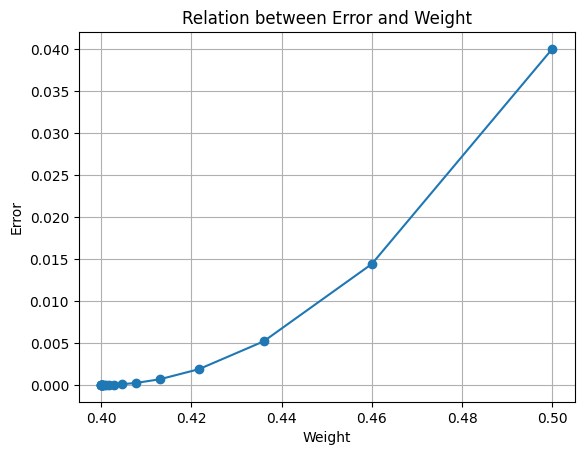

In [21]:
weight, goal_pred, input = (0.5, 0.8, 2)
alpha = 0.1

weight_values = []
error_values = []

for i in range(20):
    weight_values.append(weight)
    pred = input * weight
    error = (pred - goal_pred) ** 2
    error_values.append(error)
    derivative = input * (pred - goal_pred) # Input * delta 

    weight = weight - (derivative * alpha)

    


    print("Error: "+str(error) + " Derivative: " + str(weight_delta) + " Prediction: " + str(pred))

plt.plot(weight_values, error_values, marker='o')
plt.xlabel('Weight')
plt.ylabel('Error')
plt.title('Relation between Error and Weight')
plt.grid(True)
plt.show()


# alpha = 0.01 # this is the new part, it lets me control how fast the network learn 
# weight -= weight_delta * alpha

## Memorizing

In [26]:
input, goal, weight,  = (0.5, 0.8, 0.7)
alpha = 0.4

for i in range(20):
    pred = input * weight
    error = (pred - goal) ** 2
    derivative = input * (pred - goal)
    weight = weight - (derivative * alpha)

    print("Error: " + str(error) + " Prediction: "+ str(pred))


Error: 0.20250000000000007 Prediction: 0.35
Error: 0.16402500000000003 Prediction: 0.395
Error: 0.13286025000000004 Prediction: 0.4355
Error: 0.10761680250000004 Prediction: 0.47195
Error: 0.08716961002500005 Prediction: 0.504755
Error: 0.07060738412025001 Prediction: 0.5342795
Error: 0.05719198113740253 Prediction: 0.56085155
Error: 0.04632550472129607 Prediction: 0.5847663949999999
Error: 0.03752365882424981 Prediction: 0.6062897555
Error: 0.03039416364764233 Prediction: 0.62566077995
Error: 0.024619272554590274 Prediction: 0.6430947019550001
Error: 0.01994161076921811 Prediction: 0.6587852317595001
Error: 0.01615270472306668 Prediction: 0.6729067085835501
Error: 0.013083690825684004 Prediction: 0.6856160377251951
Error: 0.010597789568804033 Prediction: 0.6970544339526756
Error: 0.008584209550731267 Prediction: 0.7073489905574081
Error: 0.006953209736092335 Prediction: 0.7166140915016672
Error: 0.005632099886234798 Prediction: 0.7249526823515005
Error: 0.0045620009078501805 Predictio